In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('billioinare_stats.csv')

In [3]:
df['population_country'].isnull().sum()

164

In [4]:
df.loc[(df['country'] == 'Hong Kong') & (df['population_country'].isnull()), 'population_country'] = 7500000 #Replcing empty population values corresponidng to hong kong
df.loc[(df['country'] == 'Taiwan') & (df['population_country'].isnull()), 'population_country'] = 23800000 #Replcing empty population values corresponidng to hong kong
df.loc[(df['country'] == 'Ireland') & (df['population_country'].isnull()), 'population_country'] = 4900000
df.loc[(df['country'] == 'Cayman Islands') & (df['population_country'].isnull()), 'population_country'] = 68000
df.loc[(df['country'] == 'Bermuda') & (df['population_country'].isnull()), 'population_country'] = 62000
df.loc[(df['country'] == 'Bahamas') & (df['population_country'].isnull()), 'population_country'] = 393000
df.loc[(df['country'] == 'Turks and Caicos Islands') & (df['population_country'].isnull()), 'population_country'] = 38000
df.loc[(df['country'] == 'Guernsey') & (df['population_country'].isnull()), 'population_country'] = 67000
df.loc[(df['country'] == 'British Virgin Islands') & (df['population_country'].isnull()), 'population_country'] = 30000
df.loc[(df['country'] == 'Eswatini (Swaziland)') & (df['population_country'].isnull()), 'population_country'] = 120000


In [5]:
df['population_country'].isnull().sum()

38

In [6]:
df.columns.tolist()

['rank',
 'finalWorth',
 'category',
 'personName',
 'age',
 'country',
 'city',
 'source',
 'industries',
 'countryOfCitizenship',
 'organization',
 'selfMade',
 'status',
 'gender',
 'birthDate',
 'lastName',
 'firstName',
 'title',
 'date',
 'state',
 'residenceStateRegion',
 'birthYear',
 'birthMonth',
 'birthDay',
 'cpi_country',
 'cpi_change_country',
 'gdp_country',
 'gross_tertiary_education_enrollment',
 'gross_primary_education_enrollment_country',
 'life_expectancy_country',
 'tax_revenue_country_country',
 'total_tax_rate_country',
 'population_country',
 'latitude_country',
 'longitude_country']

In [7]:
df.shape

(2640, 35)

In [8]:
df['category'].nunique()

18

In [9]:
df['category'].isnull().sum()

0

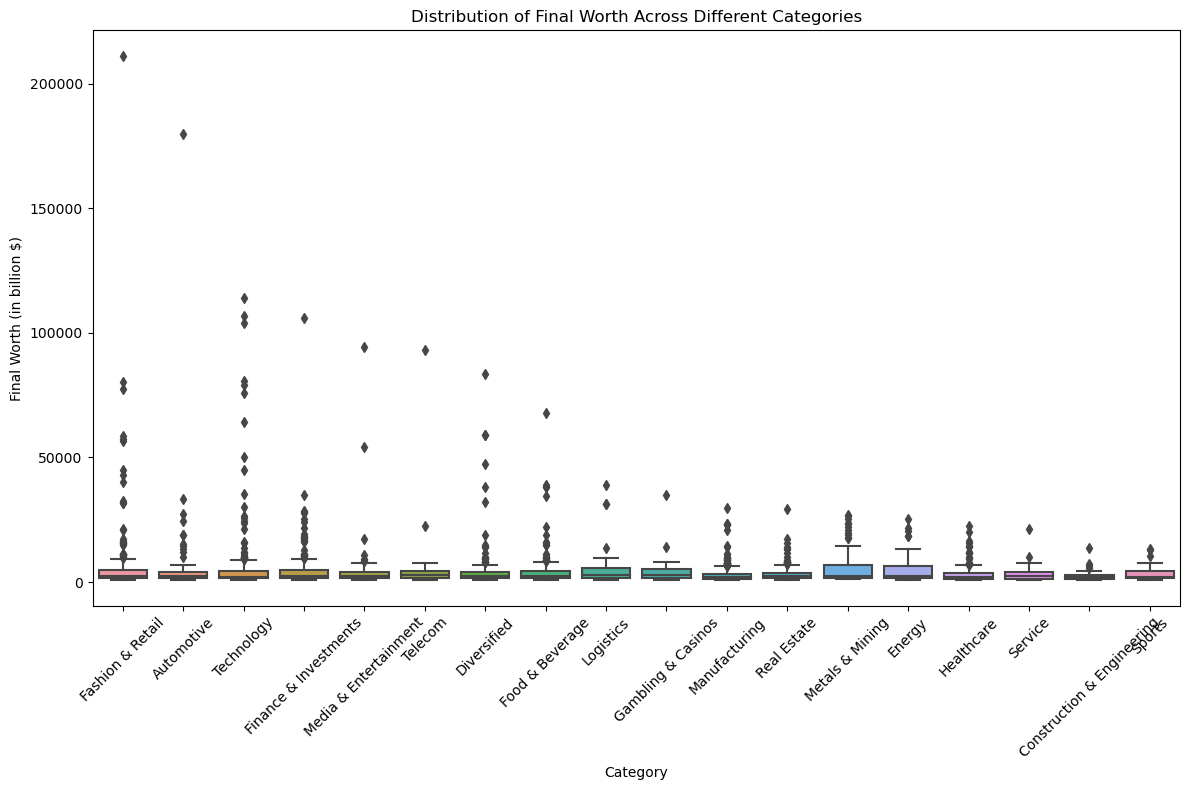

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='finalWorth', data=df)
plt.xticks(rotation=45)  
plt.title('Distribution of Final Worth Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Final Worth (in billion $)')
plt.tight_layout()  

plt.show()

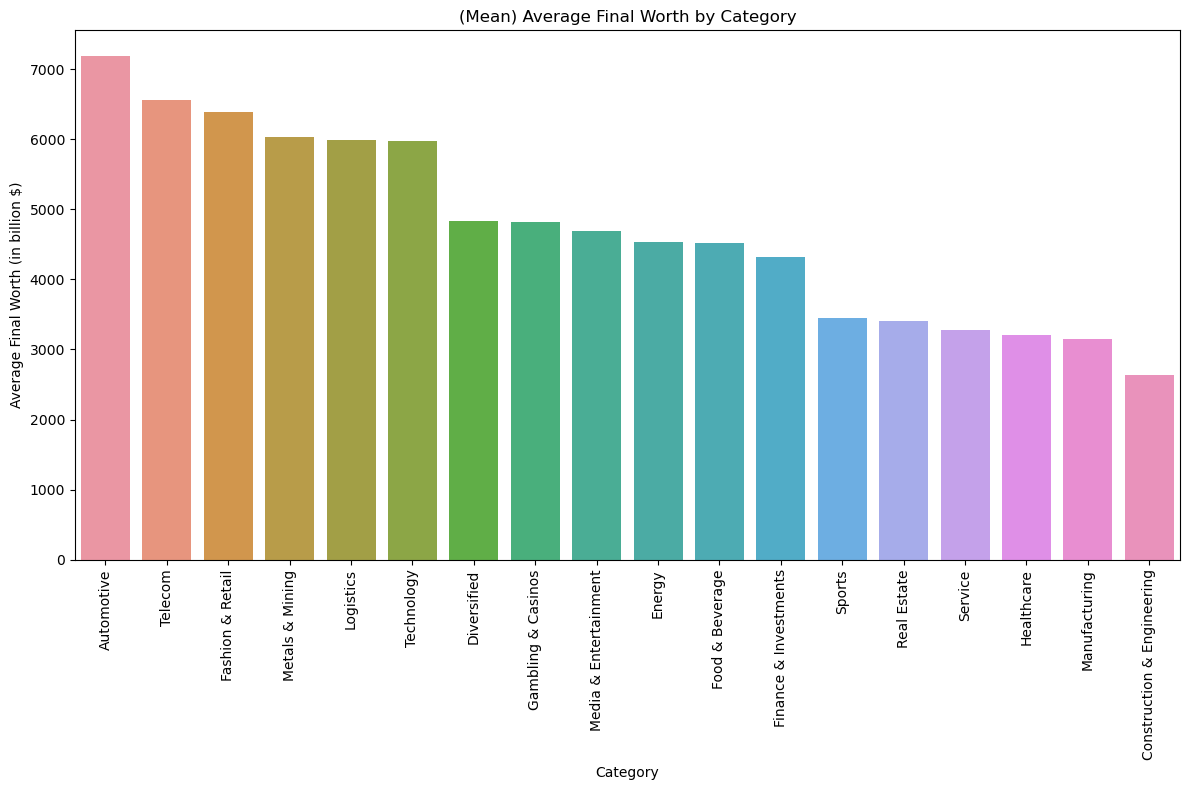

In [11]:
average_worth = df.groupby('category')['finalWorth'].mean().reset_index()


average_worth = average_worth.sort_values('finalWorth', ascending=False)
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='finalWorth', data=average_worth)
plt.xticks(rotation=90) 
plt.title('(Mean) Average Final Worth by Category')
plt.xlabel('Category')
plt.ylabel('Average Final Worth (in billion $)')
plt.tight_layout()  
plt.show()

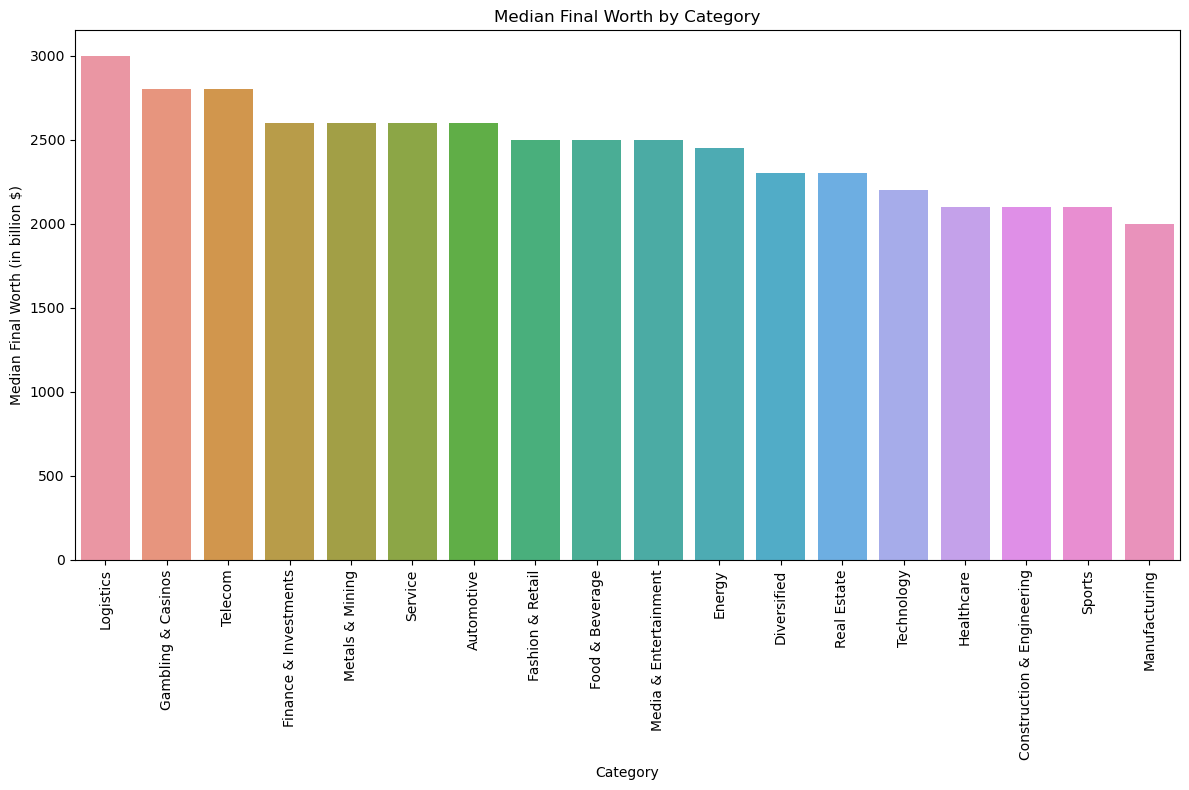

In [12]:
average_worth = df.groupby('category')['finalWorth'].median().reset_index()
average_worth = average_worth.sort_values('finalWorth', ascending=False)
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='finalWorth', data=average_worth)
plt.xticks(rotation=90) 
plt.title('Median Final Worth by Category')
plt.xlabel('Category')
plt.ylabel('Median Final Worth (in billion $)')
plt.tight_layout()  
plt.show()

In [13]:
#Number of unique countries

df['country'].nunique()

78

In [14]:
# Assuming your DataFrame is named df
# Calculate the total number of billionaires
total_billionaires = df['country'].value_counts().sum()

# Count the occurrences of each country and reset the index to turn it into a DataFrame
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Calculate the percentage of billionaires for each country
country_counts['percentage'] = (country_counts['count'] / total_billionaires) * 100

# Display the updated DataFrame
print(country_counts)

                 country  count  percentage
0          United States    754   28.977709
1                  China    523   20.099923
2                  India    157    6.033820
3                Germany    102    3.920061
4         United Kingdom     82    3.151422
..                   ...    ...         ...
73              Portugal      1    0.038432
74               Georgia      1    0.038432
75  Eswatini (Swaziland)      1    0.038432
76            Uzbekistan      1    0.038432
77               Armenia      1    0.038432

[78 rows x 3 columns]


In [15]:
country_counts.to_csv('country_counts.csv')

In [16]:
top5 = country_counts.head(30)

In [17]:
print(top5)

                 country  count  percentage
0          United States    754   28.977709
1                  China    523   20.099923
2                  India    157    6.033820
3                Germany    102    3.920061
4         United Kingdom     82    3.151422
5                 Russia     79    3.036126
6            Switzerland     78    2.997694
7              Hong Kong     68    2.613374
8                  Italy     55    2.113759
9              Singapore     46    1.767871
10                Brazil     44    1.691007
11             Australia     43    1.652575
12                Taiwan     43    1.652575
13                Canada     42    1.614143
14                 Japan     38    1.460415
15                France     35    1.345119
16           South Korea     29    1.114527
17              Thailand     28    1.076095
18                Sweden     26    0.999231
19                Israel     26    0.999231
20                Turkey     25    0.960799
21                 Spain     25 

In [18]:
print(top5['percentage'].sum())

94.77325134511916


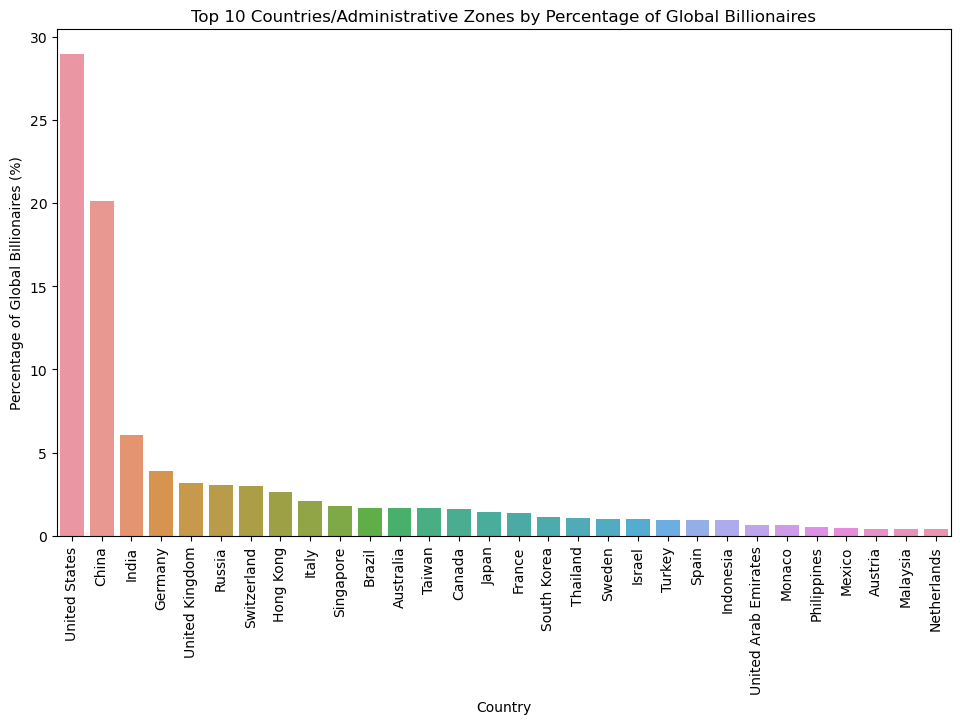

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='percentage', data=top5)
plt.title('Top 10 Countries/Administrative Zones by Percentage of Global Billionaires')
plt.xlabel('Country')
plt.ylabel('Percentage of Global Billionaires (%)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [20]:
# Distribution of billionnaire net worth by cities.
# Calculate the total number of billionaires
total_billionaires = df['city'].value_counts().sum()

# Count the occurrences of each country and reset the index to turn it into a DataFrame
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Calculate the percentage of billionaires for each country
city_counts['percentage'] = (city_counts['count'] / total_billionaires) * 100

# Display the updated DataFrame
print(city_counts)

            city  count  percentage
0       New York     99    3.855140
1        Beijing     68    2.647975
2      Hong Kong     68    2.647975
3       Shanghai     64    2.492212
4         London     61    2.375389
..           ...    ...         ...
736     Küsnacht      1    0.038941
737  Brownsville      1    0.038941
738  Montpellier      1    0.038941
739  Santa Clara      1    0.038941
740       Makati      1    0.038941

[741 rows x 3 columns]


In [21]:
top_10_city = city_counts.head(10)

In [22]:
print(top_10_city)

        city  count  percentage
0   New York     99    3.855140
1    Beijing     68    2.647975
2  Hong Kong     68    2.647975
3   Shanghai     64    2.492212
4     London     61    2.375389
5     Moscow     60    2.336449
6     Mumbai     56    2.180685
7   Shenzhen     54    2.102804
8  Singapore     45    1.752336
9      Delhi     37    1.440810


In [23]:
top_10_city['percentage'].sum()

23.831775700934575

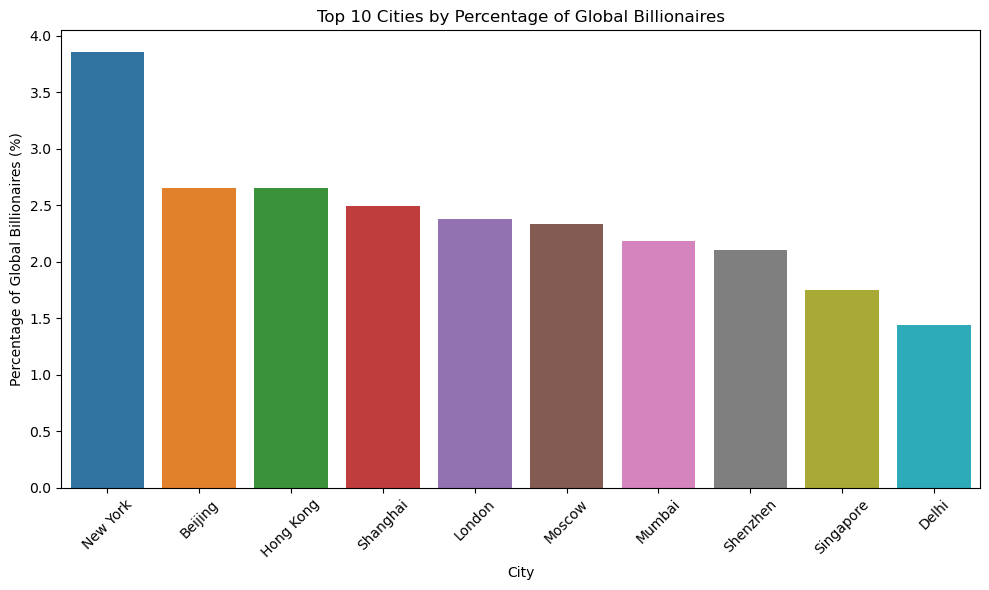

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='percentage', data=top_10_city)
plt.title('Top 10 Cities by Percentage of Global Billionaires')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Percentage of Global Billionaires (%)')
plt.tight_layout()

plt.show()

C:\Users\abhinav\AppData\Local\Temp\ipykernel_16940\395746566.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


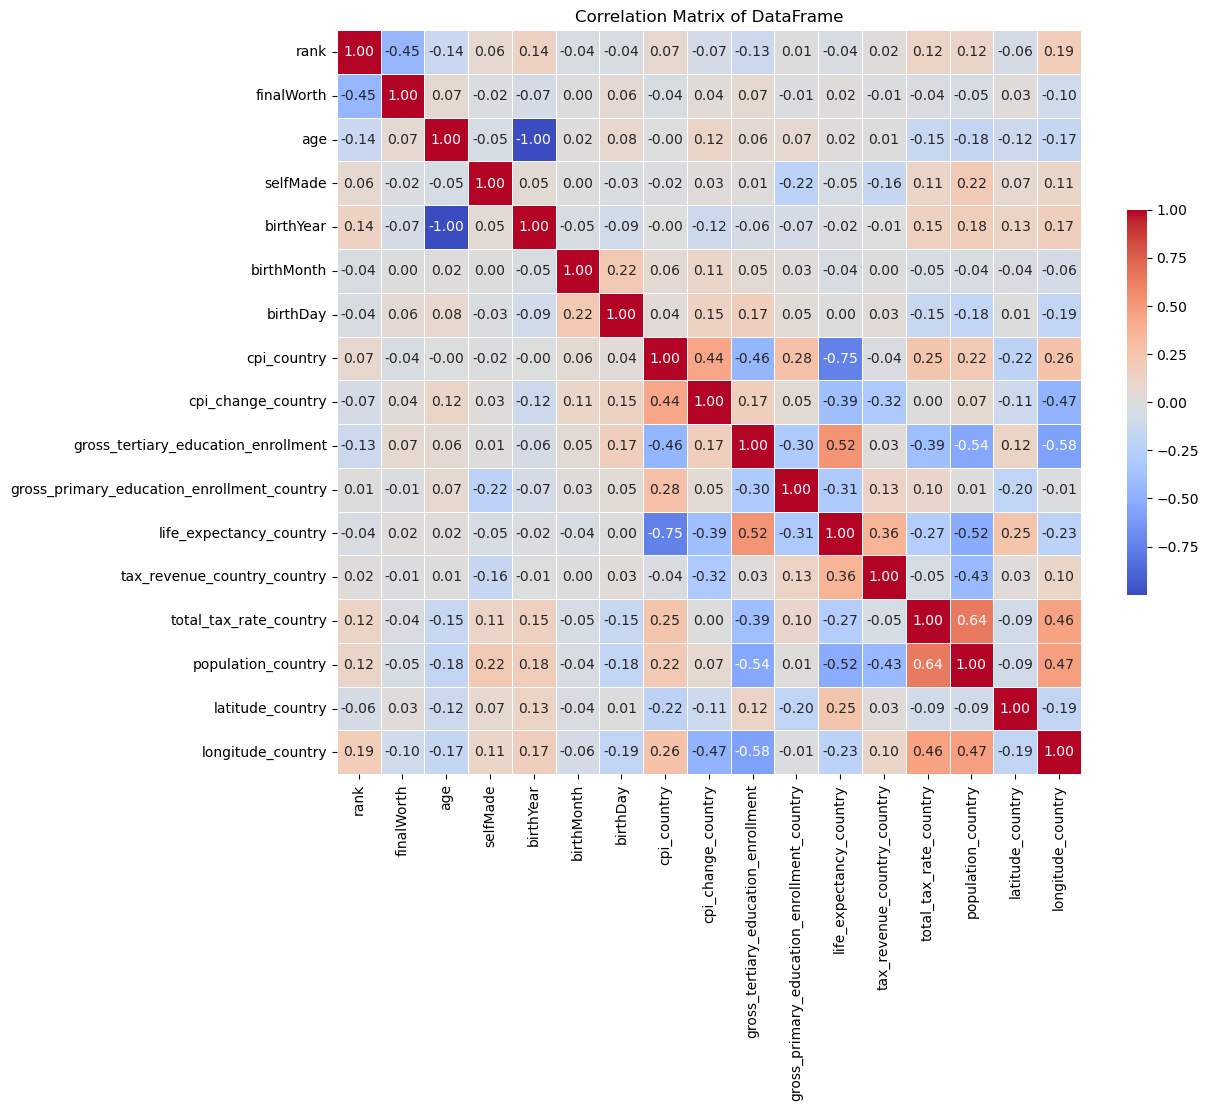

In [25]:
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of DataFrame')
plt.show()

In [26]:
#Billionnaires by population density in country
countries=df['country'].unique()

In [27]:
countries = pd.DataFrame(countries, columns=['country'])

# Now you can use the to_csv method to save the DataFrame to a CSV file
countries.to_csv('countries_population_density.csv', index=False)

In [28]:
countries = pd.read_csv('countries_population_density.csv')

In [29]:
countries.head()

,country
0,France
1,United States
2,Mexico
3,India
4,Spain


In [30]:
df_merged = pd.merge(df, countries, on='country', how='left')

In [31]:
df_merged.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [32]:
population_data = df[['country', 'population_country']].drop_duplicates()

# Merge the country counts with the population data on the 'country' column
merged_data = pd.merge(country_counts, population_data, on='country', how='left')

# Calculate the ratio of the count of billionaires to the population of the country
# We are multiplying by 1,000,000 to get the number of billionaires per million people
merged_data['billionaires_per_million'] = (merged_data['count'] / merged_data['population_country']) * 1000000

# Now sort the merged_data by 'billionaires_per_million' to get the list of countries by this ratio
sorted_countries_by_ratio = merged_data.sort_values('billionaires_per_million', ascending=False)

# Display the sorted list
print(sorted_countries_by_ratio[['country', 'billionaires_per_million']])

                     country  billionaires_per_million
24                    Monaco                436.300175
49            Cayman Islands                 44.117647
69    British Virgin Islands                 33.333333
53                   Bermuda                 32.258065
58  Turks and Caicos Islands                 26.315789
..                       ...                       ...
76                Uzbekistan                  0.029779
72                   Algeria                  0.023227
64                  Colombia                  0.019865
61                  Tanzania                  0.017240
47                   Nigeria                  0.014928

[78 rows x 2 columns]


In [33]:
sorted_countries_by_ratio.head()

,country,count,percentage,population_country,billionaires_per_million
24,Monaco,17,0.653344,38964.0,436.300175
49,Cayman Islands,3,0.115296,68000.0,44.117647
69,British Virgin Islands,1,0.038432,30000.0,33.333333
53,Bermuda,2,0.076864,62000.0,32.258065
58,Turks and Caicos Islands,1,0.038432,38000.0,26.315789


In [34]:
sorted_countries_by_ratio.to_csv('country_counts.csv')

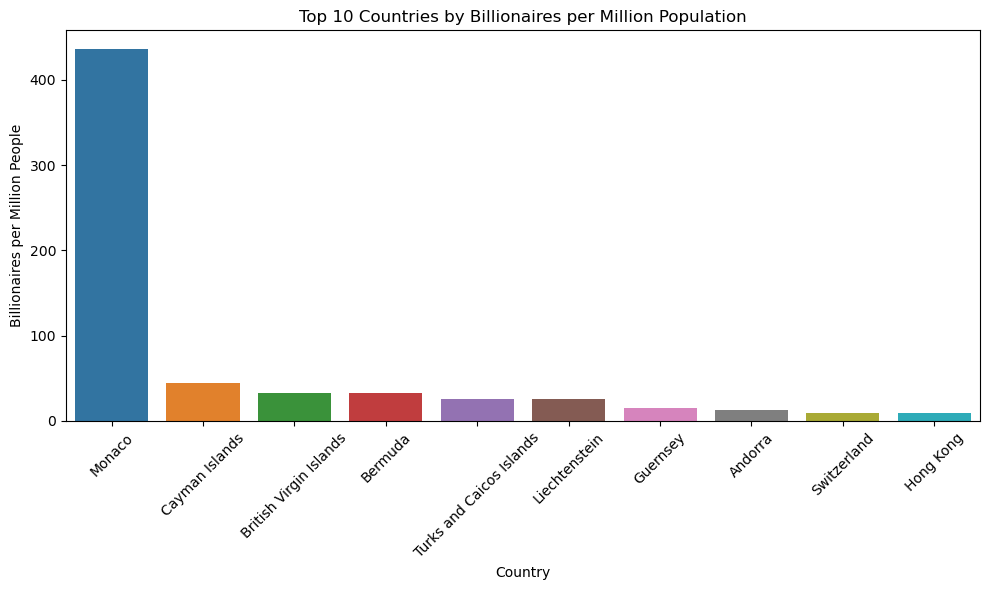

In [35]:
top10_byPop = sorted_countries_by_ratio.head(10)

#Plotting a chart
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='billionaires_per_million', data=top10_byPop)
plt.title('Top 10 Countries by Billionaires per Million Population')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Billionaires per Million People')
plt.tight_layout()

plt.show()

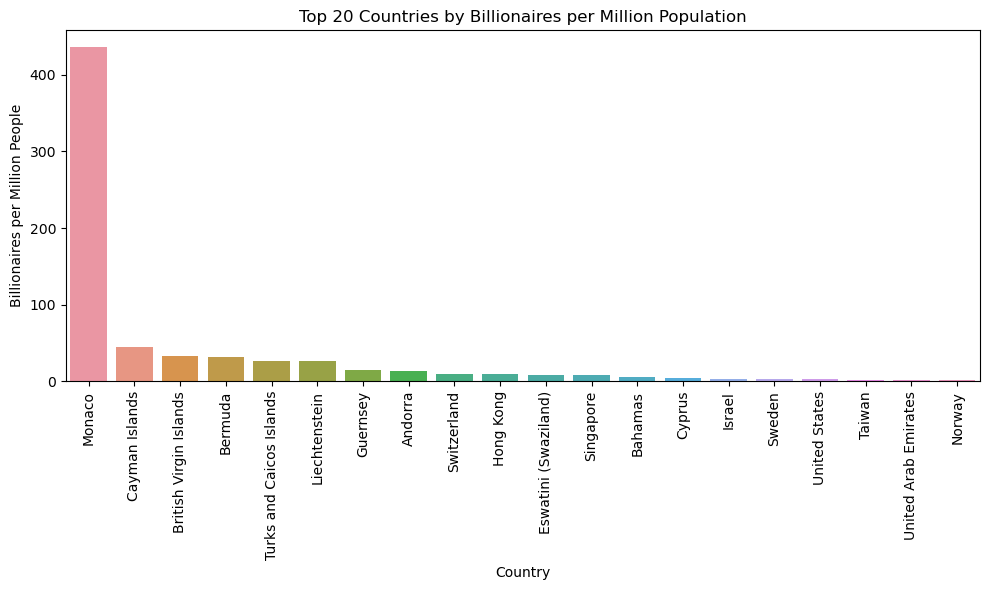

In [36]:
top10_byPop = sorted_countries_by_ratio.head(20)

#Plotting a chart
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='billionaires_per_million', data=top10_byPop)
plt.title('Top 20 Countries by Billionaires per Million Population')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Billionaires per Million People')
plt.tight_layout()

plt.show()

In [37]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [38]:
# Remove the dollar signs and commas using regular expressions, then convert to float
df['gdp_country'] = df['gdp_country'].str.replace('[$,]', '', regex=True).astype(float)


In [39]:
df = df.drop('population_country', axis=1)


In [40]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,37.090240,-95.712891


In [41]:
df = pd.merge(df, merged_data, on='country', how='left')

In [ ]:
df.head()

In [51]:
merged_data.head()

,country,count,percentage,population_country,billionaires_per_million
0,United States,754,28.977709,3.282395e+08,2.297103
1,China,523,20.099923,1.397715e+09,0.374182
2,India,157,6.033820,1.366418e+09,0.114899
3,Germany,102,3.920061,8.313280e+07,1.226953
4,United Kingdom,82,3.151422,6.683440e+07,1.226913


sports


In [44]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,latitude_country,longitude_country,count,percentage,population_country,billionaires_per_million
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,102.5,82.5,24.2,60.7,46.227638,2.213749,35.0,1.345119,67059887.0,0.521922
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,101.8,78.5,9.6,36.6,37.090240,-95.712891,754.0,28.977709,328239523.0,2.297103
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,101.8,78.5,9.6,36.6,37.090240,-95.712891,754.0,28.977709,328239523.0,2.297103
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,101.8,78.5,9.6,36.6,37.090240,-95.712891,754.0,28.977709,328239523.0,2.297103
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,101.8,78.5,9.6,36.6,37.090240,-95.712891,754.0,28.977709,328239523.0,2.297103


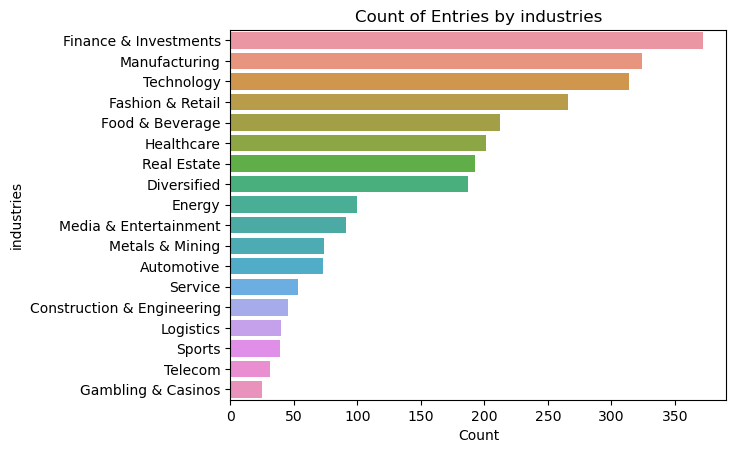

In [65]:
sns.countplot(y='industries', data=df, order = df['industries'].value_counts().index)

# Add a title and labels to the plot
plt.title('Count of Entries by industries')
plt.xlabel('Count')
plt.ylabel('industries')

# Show the plot
plt.show()

In [73]:
(df['industries'].value_counts())/2640*100

Finance & Investments         14.090909
Manufacturing                 12.272727
Technology                    11.893939
Fashion & Retail              10.075758
Food & Beverage                8.030303
Healthcare                     7.613636
Real Estate                    7.310606
Diversified                    7.083333
Energy                         3.787879
Media & Entertainment          3.446970
Metals & Mining                2.803030
Automotive                     2.765152
Service                        2.007576
Construction & Engineering     1.704545
Logistics                      1.515152
Sports                         1.477273
Telecom                        1.174242
Gambling & Casinos             0.946970
Name: industries, dtype: float64

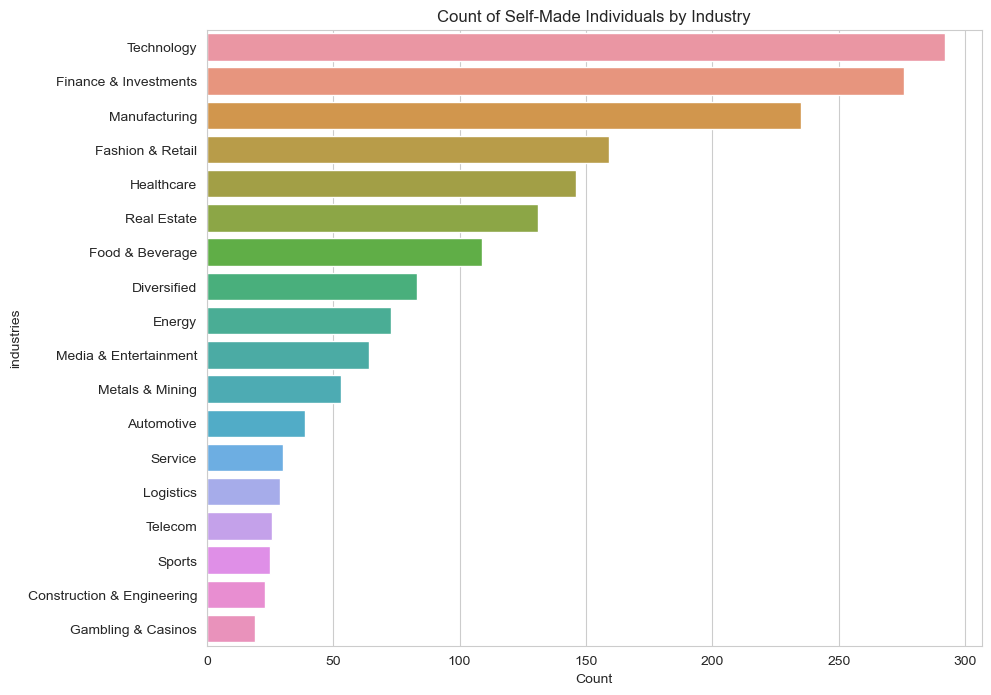

In [90]:
# Self MAde is True

df_self_made_yes = df[df['selfMade'] == True]

sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.countplot(y='industries', data=df_self_made_yes, order=df_self_made_yes['industries'].value_counts().index)

plt.title('Count of Self-Made Individuals by Industry')
plt.xlabel('Count')
plt.ylabel('industries')
plt.show()


In [107]:
df_self_made_yes=df_self_made_yes['industries'].value_counts()

KeyError: 'industries'

In [112]:
df_self_made_yes

Technology                    292
Finance & Investments         276
Manufacturing                 235
Fashion & Retail              159
Healthcare                    146
Real Estate                   131
Food & Beverage               109
Diversified                    83
Energy                         73
Media & Entertainment          64
Metals & Mining                53
Automotive                     39
Service                        30
Logistics                      29
Telecom                        26
Sports                         25
Construction & Engineering     23
Gambling & Casinos             19
Name: industries, dtype: int64

In [111]:
df_self_made_yes/1812*100

Technology                    16.114790
Finance & Investments         15.231788
Manufacturing                 12.969095
Fashion & Retail               8.774834
Healthcare                     8.057395
Real Estate                    7.229581
Food & Beverage                6.015453
Diversified                    4.580574
Energy                         4.028698
Media & Entertainment          3.532009
Metals & Mining                2.924945
Automotive                     2.152318
Service                        1.655629
Logistics                      1.600442
Telecom                        1.434879
Sports                         1.379691
Construction & Engineering     1.269316
Gambling & Casinos             1.048565
Name: industries, dtype: float64

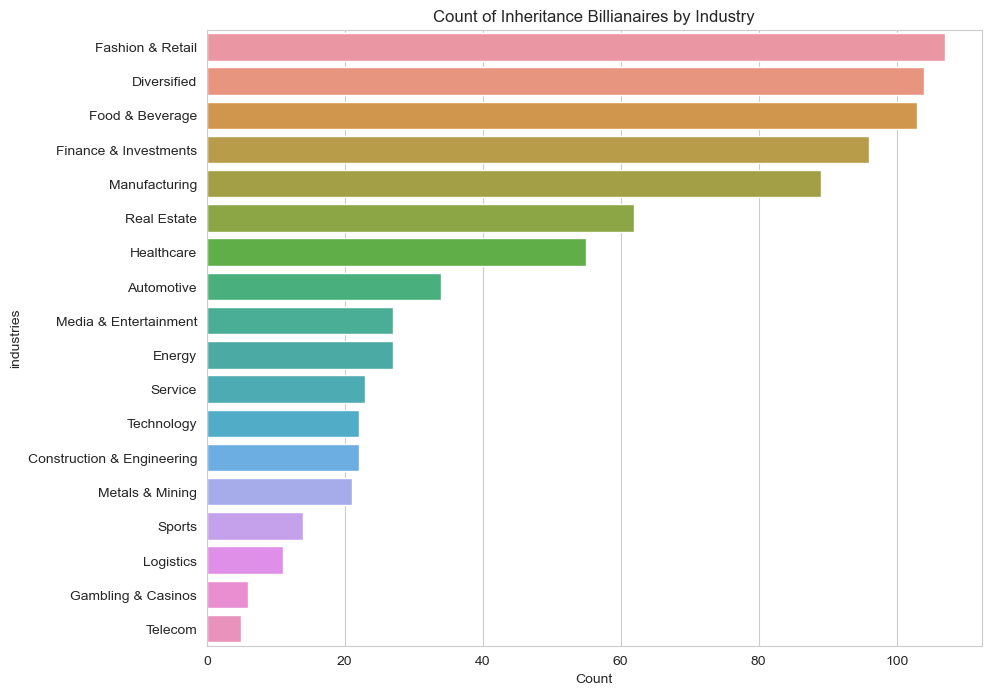

In [84]:
# Self MAde is False

df_self_made = df[df['selfMade'] == False]

sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.countplot(y='industries', data=df_self_made, order=df_self_made['industries'].value_counts().index)

plt.title('Count of Inheritance Billianaires by Industry')
plt.xlabel('Count')
plt.ylabel('industries')
plt.show()


In [117]:
df_self_made_no = df_self_made['industries'].value_counts()

In [118]:
df_self_made_no

Fashion & Retail              107
Diversified                   104
Food & Beverage               103
Finance & Investments          96
Manufacturing                  89
Real Estate                    62
Healthcare                     55
Automotive                     34
Media & Entertainment          27
Energy                         27
Service                        23
Technology                     22
Construction & Engineering     22
Metals & Mining                21
Sports                         14
Logistics                      11
Gambling & Casinos              6
Telecom                         5
Name: industries, dtype: int64

In [119]:
(df_self_made_no/828)*100

Fashion & Retail              12.922705
Diversified                   12.560386
Food & Beverage               12.439614
Finance & Investments         11.594203
Manufacturing                 10.748792
Real Estate                    7.487923
Healthcare                     6.642512
Automotive                     4.106280
Media & Entertainment          3.260870
Energy                         3.260870
Service                        2.777778
Technology                     2.657005
Construction & Engineering     2.657005
Metals & Mining                2.536232
Sports                         1.690821
Logistics                      1.328502
Gambling & Casinos             0.724638
Telecom                        0.603865
Name: industries, dtype: float64

In [131]:
print("WELCOME TO CUACHY DISTRIBUTION fORTUNE CHANGER APP!")

name = input("What is your name?").lower()
countryhome = input("In which country do you reside?").lower()
homecity = input("What city do you live in?").lower()

# Present options to the user and take input for industry
industry_options = {
    1: 'Automotive',
    2: 'Technology',
    3: 'Finance & Investments',
    4: 'Media & Entertainment',
    5: 'Telecom',
    6: 'Fashion & Retail',
    7: 'Food & Beverage',
    8: 'Diversified',
    9: 'Logistics',
    10: 'Manufacturing',
    11: 'Real Estate',
    12: 'Energy',
    13: 'Metals & Mining',
    14: 'Service',
    15: 'Healthcare',
    16: 'Gambling & Casinos',
    17: 'Construction & Engineering',
    18: 'Sports'
}

# Display options
print("Please select an industry by entering the corresponding number:")
for key, value in industry_options.items():
    print(f"{key}: {value}")

# Take user input
industry_choice = int(input("Your choice: "))
industries = industry_options.get(industry_choice, "Not specified").lower()

inheritance = input("Are your parents billionaires? (yes/no)").lower()

# Assuming merged_data is already defined
billionaires_per_million_home = merged_data.loc[merged_data['country'].str.lower() == countryhome, 'billionaires_per_million'].values[0]
billionaires_per_million_us = merged_data.loc[merged_data['country'].str.lower() == 'united states', 'billionaires_per_million'].values[0]

# Calculate the country_multiplier
country_multiplier = billionaires_per_million_us / billionaires_per_million_home

if inheritance == "no":
    industry_ratio = df_self_made_yes['Technology'] / df_self_made_yes[industries.title()]
else:
    industry_ratio = df_self_made_no['Fashion & Retail'] / df_self_made_no[industries.title()] 

# Calculate the overall improvement factor
overall_improvement_factor = country_multiplier * industry_ratio  # Convert to percentage

# Display the enhanced message
print(f"Based on your input {name}, if you move from {countryhome.title()} to the United States, "
      f"the chances of you becoming a billionaire will increase by {country_multiplier:.2f} times. "
      f"Switching to {'Fashion & Retail' if inheritance == 'yes' else 'Technology'} would it up by {industry_ratio} times. "
      f"If you move to the United States and switch to {'Fashion & Retail' if inheritance == 'yes' else 'Technology'}, "
      f"you'd improve your chances of being a billionaire by {overall_improvement_factor:.2f} times")



WELCOME TO CUACHY DISTRIBUTION fORTUNE CHANGER APP!


What is your name? Alex
In which country do you reside? India
What city do you live in? delhi


Please select an industry by entering the corresponding number:
1: Automotive
2: Technology
3: Finance & Investments
4: Media & Entertainment
5: Telecom
6: Fashion & Retail
7: Food & Beverage
8: Diversified
9: Logistics
10: Manufacturing
11: Real Estate
12: Energy
13: Metals & Mining
14: Service
15: Healthcare
16: Gambling & Casinos
17: Construction & Engineering
18: Sports


Your choice:  17
Are your parents billionaires? (yes/no) no


Based on your input alex, if you move from India to the United States, the chances of you becoming a billionaire will increase by 19.99 times. Switching to Technology would it up by 12.695652173913043 times. If you move to the United States and switch to Technology, you'd improve your chances of being a billionaire by 253.82 times
